/var/folders/fd/vqz28gfs1w18c14v378f7vpw0000gp/T/ipykernel_90226/2485477694.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_df['t-SNE1'], tsne_df['t-SNE2'], alpha=0.7, edgecolor='k', cmap='viridis')


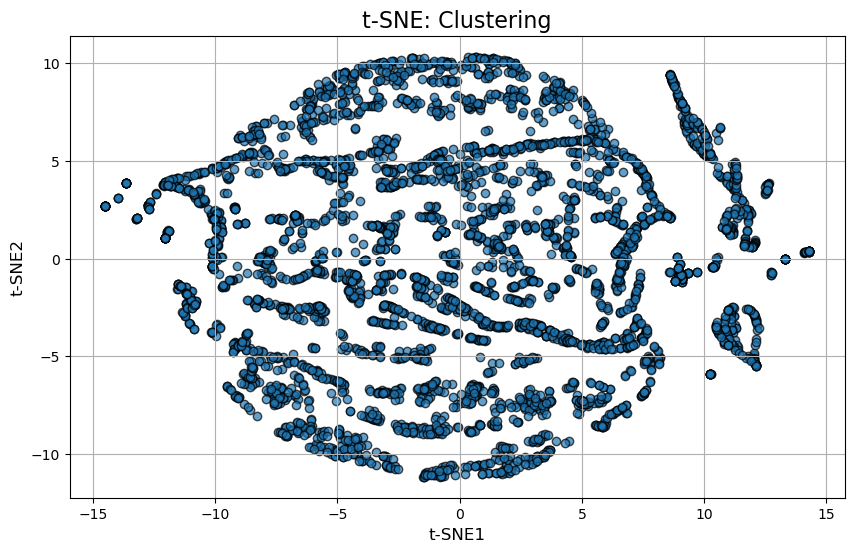

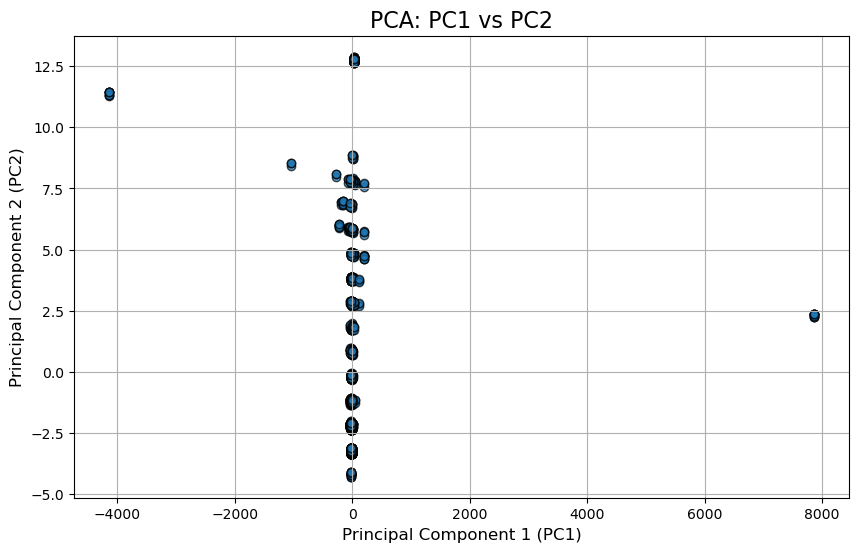

In [8]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load the dataset
data_path = "../data/preprocessed_gnss_data.csv"
df = pd.read_csv(data_path, sep=";")
#df = pd.read_csv(data_path, sep=";").head(1500)

# Select numeric columns only
numeric_columns = ['AGC', 'SNR', 'latitude', 'longitude', 'height', 'num_satellites']
X = df[numeric_columns]

# Fill missing values with 0
X = X.fillna(0)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Perform t-SNE for clustering
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(X)

# Create a DataFrame for t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=['t-SNE1', 't-SNE2'])

# Plot t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(tsne_df['t-SNE1'], tsne_df['t-SNE2'], alpha=0.7, edgecolor='k', cmap='viridis')

plt.title('t-SNE: Clustering', fontsize=16)
plt.xlabel('t-SNE1', fontsize=12)
plt.ylabel('t-SNE2', fontsize=12)
plt.grid(True)
plt.show()

# Optional: Plot PCA alongside for comparison
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7, edgecolor='k')

plt.title('PCA: PC1 vs PC2', fontsize=16)
plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('Principal Component 2 (PC2)', fontsize=12)
plt.grid(True)
plt.show()
